## Marketing Strategy Analysis
#### Programming Script and Technical Report

### Table of Content
1. Introduction
2. Data Loading and Quality 
3. Feature Additions and Engineering
4. Exploratory Data Analysis and Statistical Analysis
5. Final Recommendations (Optimal Sales)

### 1. Introduction

**Introduction**

Welcome to the "Marketing Campaign Analytics" Python project, where our goal is to optimize marketing campaigns and create a data-driven marketing strategy using Python. This project utilizes machine learning models, specifically linear regression and correlation analysis, to identify the most effective marketing tactics that significantly impact sales. The ultimate objective is to generate an ROI table that can be presented to management for informed decision-making.

**Background of the Dataset**

We are working with data from three types of hospital accounts: big, medium, and small hospitals. The sales are categorized into organic sales and inorganic revenue generated through marketing strategies such as phone calls, emails, flyers, and sales visits.

## Import Libraries

In [1]:
# Importing the Pandas library for data manipulation and analysis
import pandas as pd

# Importing the NumPy library for numerical operations and array manipulations
import numpy as np

# Importing the Seaborn library for data visualization based on Matplotlib, providing an aesthetically pleasing and informative statistical graphics
import seaborn as sns

# Importing the SciPy library for scientific and technical computing, including statistical analysis tools
import scipy.stats

import matplotlib.pyplot as plt  # Importing plt from matplotlib.pyplot
from sklearn.preprocessing import LabelEncoder



### 2. Data Loading and Quality Checks

In [125]:
data=pd.read_csv('Campaign-Data.csv')

In [81]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Client ID      Client Type  Number of Customers  Montly Target  Zip Code  \
0  ID-987275  Medium Facility                 2800            125      1003   
1  ID-987275  Medium Facility                 2800            125      1003   
2  ID-987275  Medium Facility                 2800            125      1003   
3  ID-987275  Medium Facility                 2800            125      1003   
4  ID-987275  Medium Facility                 2800            125      1003   

  Calendardate  Amount Collected  Unit Sold  Campaign (Email)  \
0   16-01-2014                 0          0               0.0   
1   16-02-2014           3409460         24               0.0   
2   18-03-2014          10228384         75               0.0   
3   18-04-2014          17047304        123               0.0   
4   19-05-2014          23866224        171               0.0   

   Campaign (Flyer)  Campaign (Phone)  Sales Contact 1  Sales Contact 2  \
0               0.0           

In [82]:
# Display general information about the dataset
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              2976 non-null   object 
 1   Client Type            2976 non-null   object 
 2   Number of Customers    2976 non-null   int64  
 3   Montly Target          2976 non-null   int64  
 4   Zip Code               2976 non-null   int64  
 5   Calendardate           2976 non-null   object 
 6   Amount Collected       2976 non-null   int64  
 7   Unit Sold              2976 non-null   int64  
 8   Campaign (Email)       2976 non-null   float64
 9   Campaign (Flyer)       2976 non-null   float64
 10  Campaign (Phone)       2976 non-null   float64
 11  Sales Contact 1        2976 non-null   float64
 12  Sales Contact 2        2976 non-null   float64
 13  Sales Contact 3        2976 non-null   float64
 14  Sales Contact 4        2976 non-nu

In [83]:
# Displaying column names
print(data.columns)

Index(['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition'],
      dtype='object')


In [84]:
data.head()

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


In [85]:
# Display the shape of the dataset (number of rows and columns)
print("\nDataset Shape:")
print(data.shape)


Dataset Shape:
(2976, 17)


In [86]:
# Display basic statistics of numerical columns
print("\nDescriptive Statistics:")
data.describe()


Descriptive Statistics:


,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5
count,2976.000000,2976.000000,2976.0,2.976000e+03,2976.000000,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03
mean,1456.935484,75.080645,1003.0,1.700440e+07,121.464718,1.432850e+05,6.854186e+05,2.977743e+04,1.313407e+05,2.023319e+06,1.867487e+06,7.076361e+04,1.462954e+04
std,1669.848734,87.042114,0.0,3.025803e+07,216.413984,7.230452e+05,1.727587e+06,3.832134e+05,1.034882e+06,3.396991e+06,3.271349e+06,3.869872e+05,8.905955e+04
min,0.000000,5.000000,1003.0,-2.216150e+07,-63.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,240.000000,10.000000,1003.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,960.000000,47.500000,1003.0,3.409460e+06,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.450000e+05,3.225000e+05,0.000000e+00,0.000000e+00
75%,2090.000000,101.250000,1003.0,2.045676e+07,147.000000,0.000000e+00,8.148285e+04,0.000000e+00,0.000000e+00,2.580000e+06,2.580000e+06,0.000000e+00,0.000000e+00
max,9840.000000,510.000000,1003.0,2.079771e+08,1500.000000,1.144673e+07,1.359395e+07,9.617380e+06,2.902500e+07,3.063750e+07,2.612250e+07,4.837500e+06,1.612500e+06


In [127]:
# Display unique values only for 'Client Type' and 'Number of Competition' columns
print("\nUnique Values in Categorical Columns:")
for column in ['Client Type', 'Number of Competition']:
    print(f"{column}: {data[column].unique()}")



Unique Values in Categorical Columns:
Client Type: ['Medium Facility' 'Large Facility ' 'Small Facility ' 'Private Facility']
Number of Competition: ['Low' 'High']


In [128]:
# Display missing values in the dataset
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Client ID                0
Client Type              0
Number of Customers      0
Montly Target            0
Zip Code                 0
Calendardate             0
Amount Collected         0
Unit Sold                0
Campaign (Email)         0
Campaign (Flyer)         0
Campaign (Phone)         0
Sales Contact 1          0
Sales Contact 2          0
Sales Contact 3          0
Sales Contact 4          0
Sales Contact 5          0
Number of Competition    0
dtype: int64


### 3. Feature Additions and Engineering

In this project, "Amount Collected" serves as the target variable, while the independent variables consist of "Campaign (Email)," "Campaign (Flyer)," "Campaign (Phone)," "Sales Contact 1," "Sales Contact 2," "Sales Contact 3," "Sales Contact 4," and "Sales Contact 5."

In [129]:
## Creation of Additional Features 
# Convert 'Calendardate' to datetime with dayfirst=True
#data['Calendardate'] = pd.to_datetime(data['Calendardate'], dayfirst=True)

# Create additional features for month and year
#data['Calendar_Month'] = data['Calendardate'].dt.month
#data['Calendar_Year'] = data['Calendardate'].dt.year

In [130]:
# Drop the 'Client ID' column
data.drop('Client ID', axis=1, inplace=True)

In [131]:
# Drop the 'Zip Code' column
data.drop('Zip Code', axis=1, inplace=True)

In [132]:
# Drop the 'Calendardate' column
data.drop('Calendardate', axis=1, inplace=True)

In [133]:
# Label encoding for 'Client Type' and 'Number of Competition'
#label_encoder = LabelEncoder()
#data['Client Type'] = label_encoder.fit_transform(data['Client Type'])
#data['Number of Competition'] = label_encoder.fit_transform(data['Number of Competition'])

In [134]:
data.head()

,Client Type,Number of Customers,Montly Target,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,Medium Facility,2800,125,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,Medium Facility,2800,125,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,Medium Facility,2800,125,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,Medium Facility,2800,125,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,Medium Facility,2800,125,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


In [135]:
data.shape

(2976, 14)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client Type            2976 non-null   object 
 1   Number of Customers    2976 non-null   int64  
 2   Montly Target          2976 non-null   int64  
 3   Amount Collected       2976 non-null   int64  
 4   Unit Sold              2976 non-null   int64  
 5   Campaign (Email)       2976 non-null   float64
 6   Campaign (Flyer)       2976 non-null   float64
 7   Campaign (Phone)       2976 non-null   float64
 8   Sales Contact 1        2976 non-null   float64
 9   Sales Contact 2        2976 non-null   float64
 10  Sales Contact 3        2976 non-null   float64
 11  Sales Contact 4        2976 non-null   float64
 12  Sales Contact 5        2976 non-null   float64
 13  Number of Competition  2976 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 325.6+ 

### 4. Exploratory Data Analysis and Statistical Analysis


<b> 4.1 Exploring and Understanding basics data </b>

1. Distribution of Data across different accounts
2. Difference of Sales in Account Types (Using Categorical Mean)

<b> 4.2 Statistical Analysis - Answering the Questions</b>
1. Impact of Marketing Strategy on Sales (Using Correlation, Regression and Decision Tree)
2. Impact of Competition on Sales
3. How different types of client can have different strategies (Broken down Question 1 and Question 2 based on Account Type)

### 4.2 Impact of Marketing Strategy on Sales 

#### Understanding of distrubtions

In [137]:
# Percentage distribution of 'Client Type'
percentage_distribution = data['Client Type'].value_counts(normalize=True) * 100
percentage_distribution = percentage_distribution.round(0).astype(int)  # Round to 0 decimal places
print("Percentage Distribution of Client Type:")
print(percentage_distribution)

Percentage Distribution of Client Type:
Client Type
Large Facility      46
Small Facility      28
Medium Facility     17
Private Facility     9
Name: proportion, dtype: int32


The result indicates that among the various client types, 46% are classified as Large Facility, 28% as Small Facility, 17% as Medium Facility, and 9% as Private Facility.

In [138]:
# Display the count of each category in 'Client Type' as whole numbers
whole_numbers_counts = (percentage_distribution * len(data)).round().astype(int)
print("Counts of each category in 'Client Type' as whole numbers:")
print(whole_numbers_counts)

Counts of each category in 'Client Type' as whole numbers:
Client Type
Large Facility      136896
Small Facility       83328
Medium Facility      50592
Private Facility     26784
Name: proportion, dtype: int32


The counts of each category in the 'Client Type' variable are as follows: 136,896 instances of Large Facility, 83,328 instances of Small Facility, 50,592 instances of Medium Facility, and 26,784 instances of Private Facility.

In [139]:
# Crosstabulation of 'Number of Competition' and 'Client Type' with column percentages and totals
cross_table = pd.crosstab(data['Number of Competition'], data['Client Type'], margins=True, normalize='columns')
# Display the cross-tabulation
print("Cross-Tabulation of 'Number of Competition' and 'Client Type':")
cross_table

Cross-Tabulation of 'Number of Competition' and 'Client Type':


Client Type,Large Facility,Medium Facility,Private Facility,Small Facility,All
Number of Competition,,,,,
High,0.166667,0.166667,0.166667,0.166667,0.166667
Low,0.833333,0.833333,0.833333,0.833333,0.833333


The cross-tabulation table displays the distribution of 'Client Type' categories across different levels of 'Number of Competition.' The values represent the proportions of each 'Client Type' within the specified 'Number of Competition' levels. For instance, in the 'High' competition category, each 'Client Type'—Large Facility, Medium Facility, Private Facility, and Small Facility—constitutes 16.67% of the total instances within that competition level. In contrast, in the 'Low' competition category, each 'Client Type' represents 83.33% of the total instances within that competition level.

In [101]:
# Display general statistics
print("General Statistics:")
data.describe()

General Statistics:


,Number of Customers,Montly Target,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5
count,2976.000000,2976.000000,2.976000e+03,2976.000000,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03
mean,1456.935484,75.080645,1.700440e+07,121.464718,1.432850e+05,6.854186e+05,2.977743e+04,1.313407e+05,2.023319e+06,1.867487e+06,7.076361e+04,1.462954e+04
std,1669.848734,87.042114,3.025803e+07,216.413984,7.230452e+05,1.727587e+06,3.832134e+05,1.034882e+06,3.396991e+06,3.271349e+06,3.869872e+05,8.905955e+04
min,0.000000,5.000000,-2.216150e+07,-63.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,240.000000,10.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,960.000000,47.500000,3.409460e+06,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.450000e+05,3.225000e+05,0.000000e+00,0.000000e+00
75%,2090.000000,101.250000,2.045676e+07,147.000000,0.000000e+00,8.148285e+04,0.000000e+00,0.000000e+00,2.580000e+06,2.580000e+06,0.000000e+00,0.000000e+00
max,9840.000000,510.000000,2.079771e+08,1500.000000,1.144673e+07,1.359395e+07,9.617380e+06,2.902500e+07,3.063750e+07,2.612250e+07,4.837500e+06,1.612500e+06


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

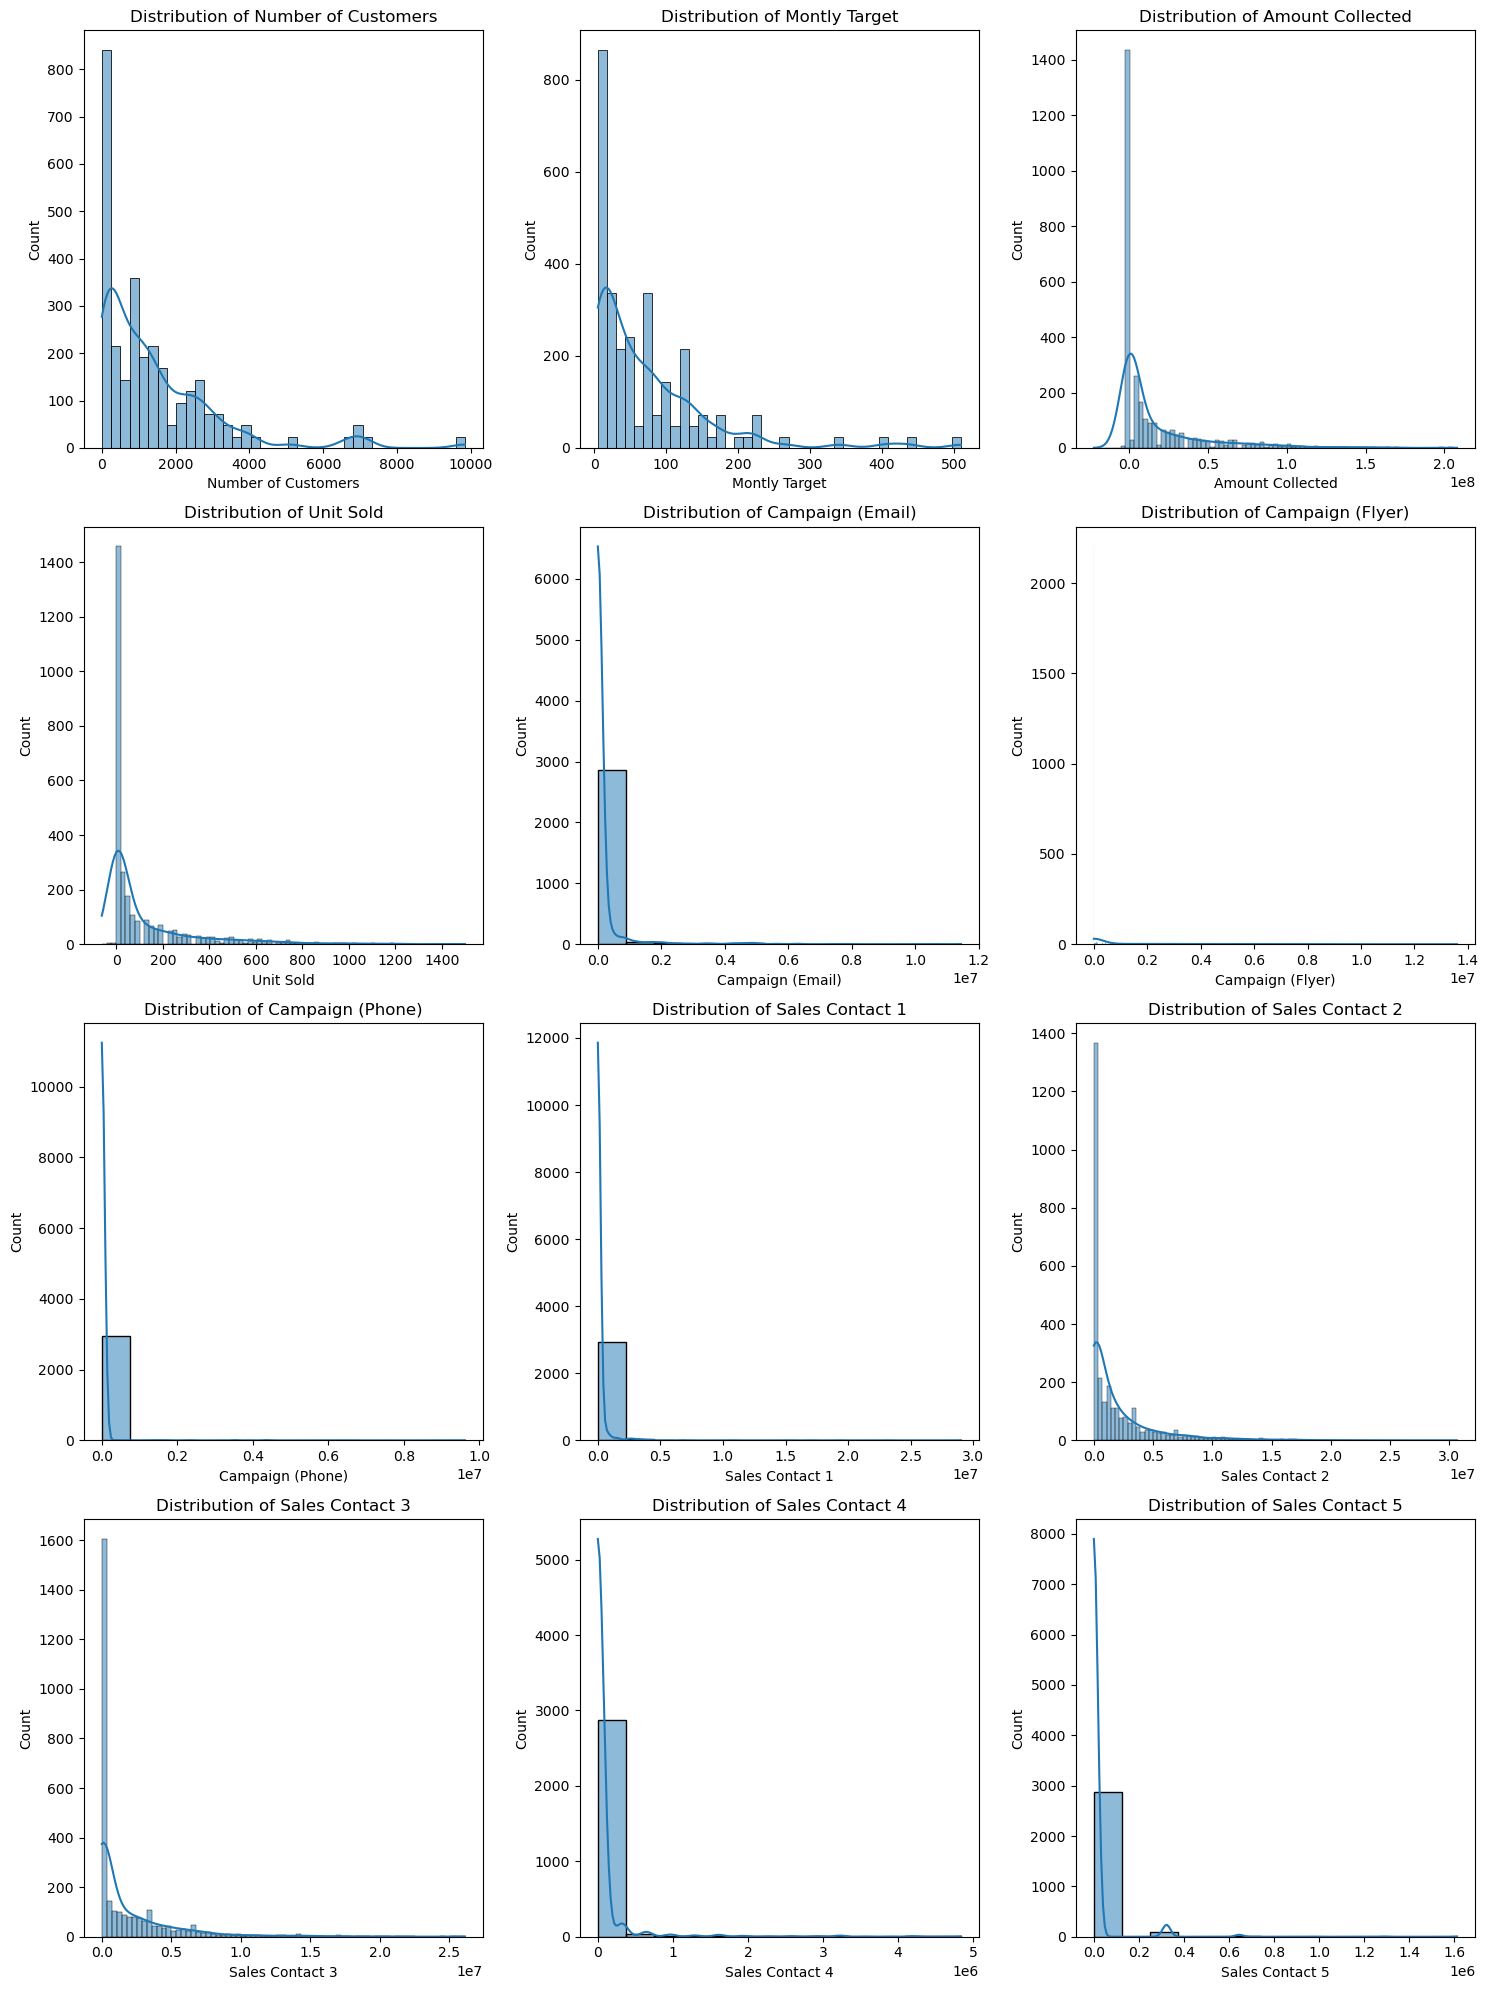

In [140]:
# Distribution of Numerical Features
numerical_features = data.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns needed for subplots
num_features = len(numerical_features)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)

# Create a figure with subplots
plt.figure(figsize=(15, 5 * num_rows))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    
    # Plot histogram with KDE
    sns.histplot(data[feature], kde=True)
    
    # Add title to each subplot
    plt.title(f'Distribution of {feature}')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plots
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

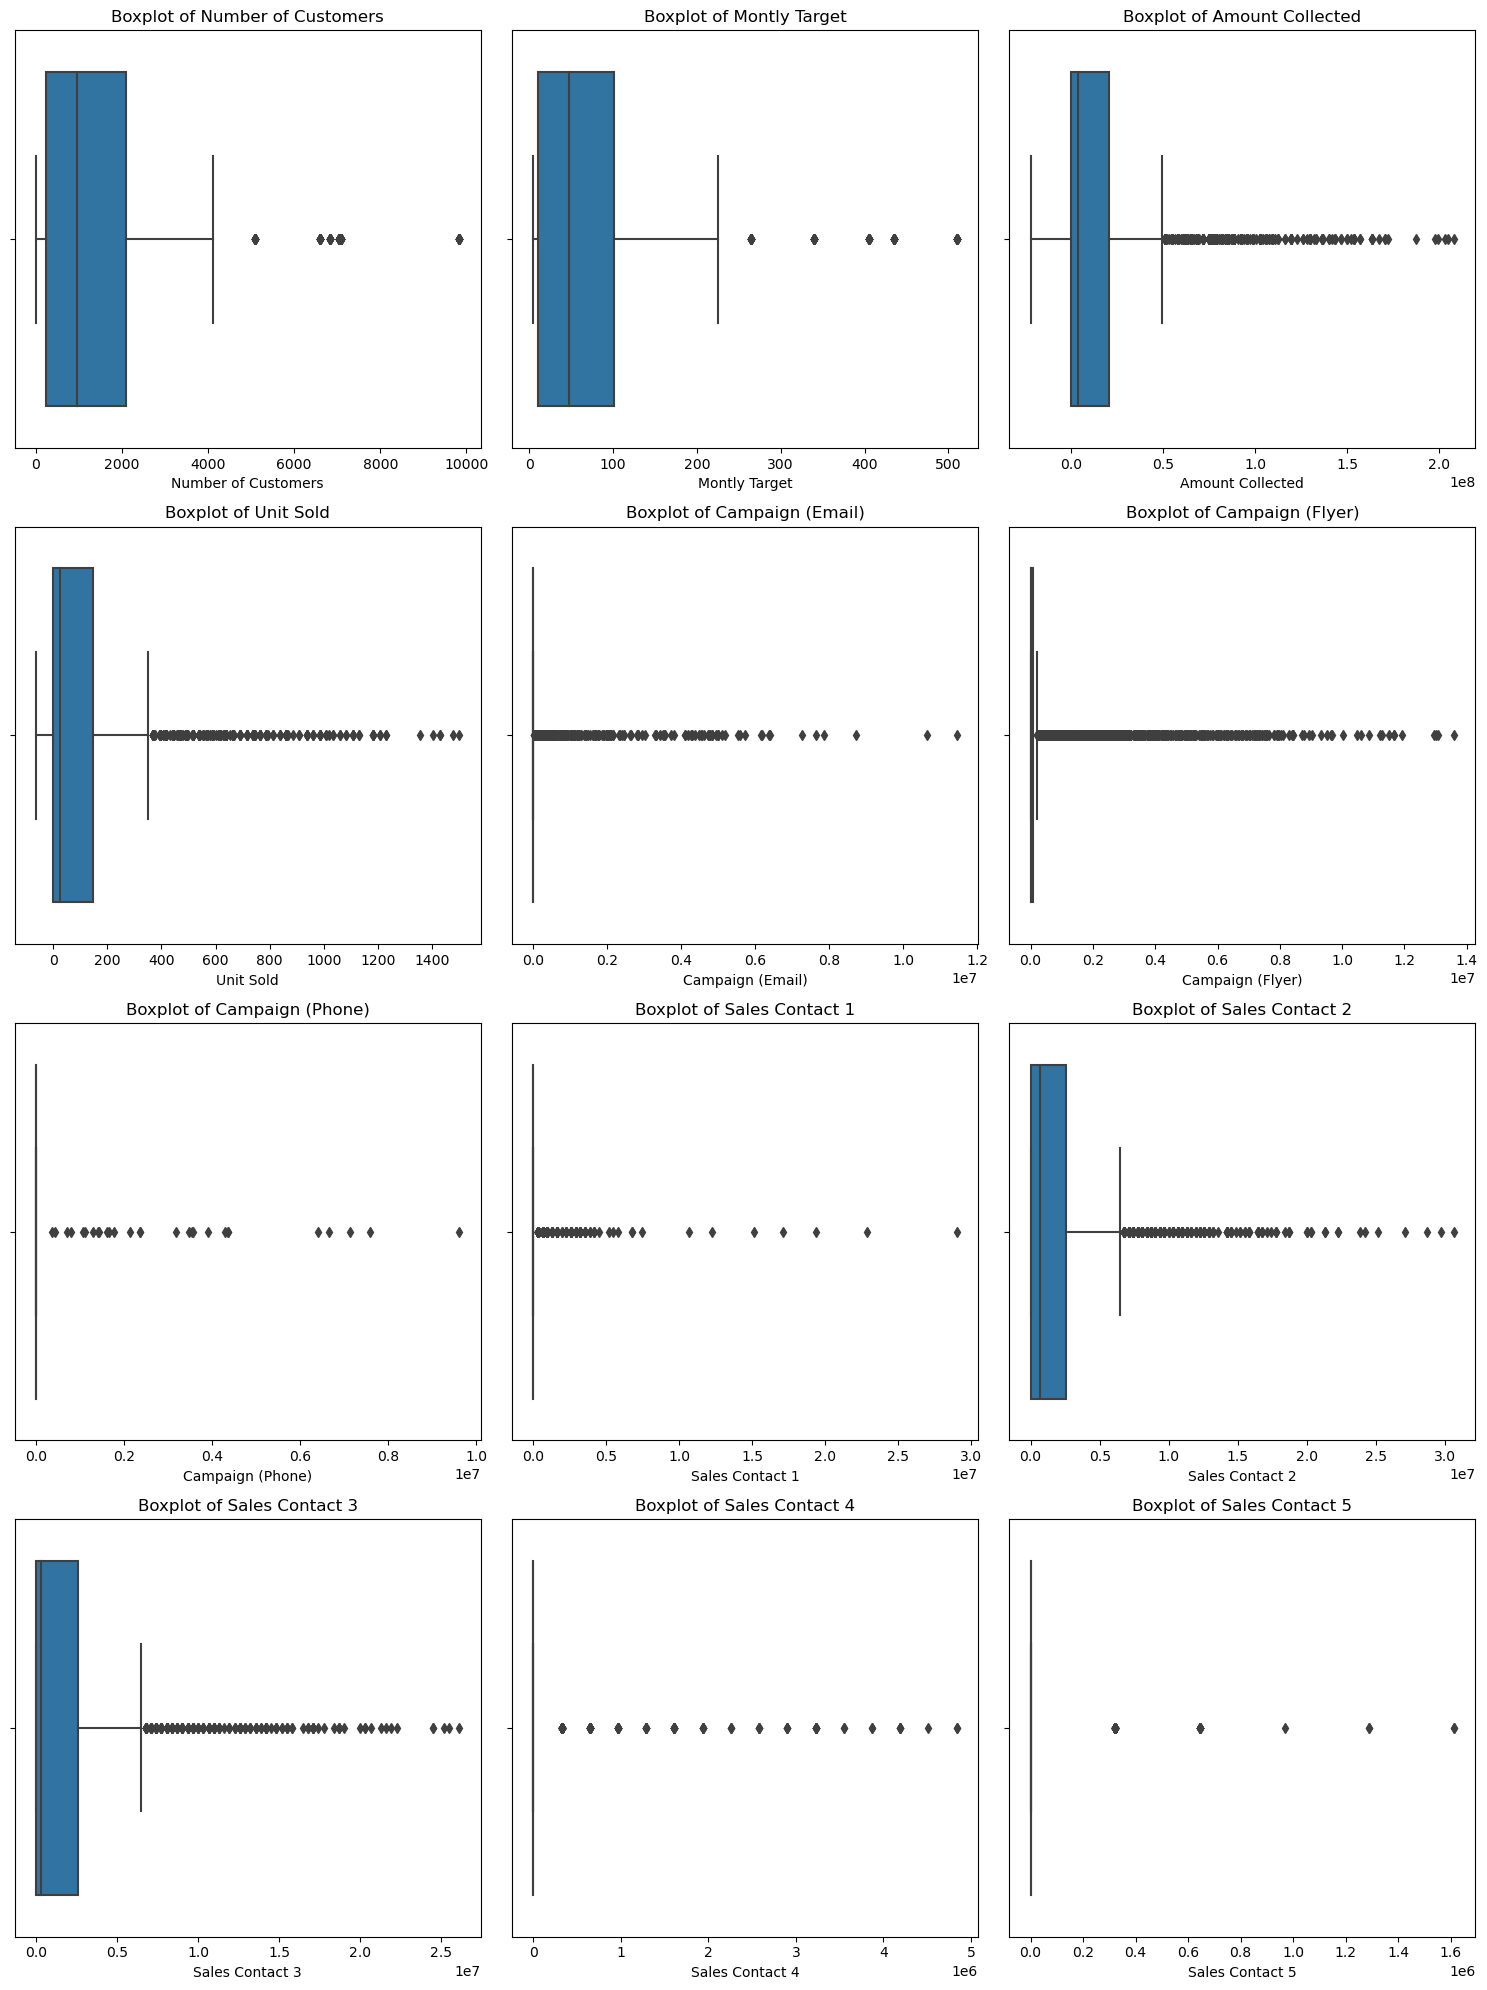

In [103]:
# Boxplots for Numerical Features
plt.figure(figsize=(15, 5 * num_rows))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    
    # Plot boxplot
    sns.boxplot(x=data[feature])
    
    # Add title to each subplot
    plt.title(f'Boxplot of {feature}')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plots
plt.show()

In [104]:
print(data.columns)

Index(['Client Type', 'Number of Customers', 'Montly Target',
       'Amount Collected', 'Unit Sold', 'Campaign (Email)', 'Campaign (Flyer)',
       'Campaign (Phone)', 'Sales Contact 1', 'Sales Contact 2',
       'Sales Contact 3', 'Sales Contact 4', 'Sales Contact 5',
       'Number of Competition'],
      dtype='object')


In [105]:
data.head()

,Client Type,Number of Customers,Montly Target,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,Medium Facility,2800,125,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,Medium Facility,2800,125,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,Medium Facility,2800,125,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,Medium Facility,2800,125,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,Medium Facility,2800,125,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client Type            2976 non-null   object 
 1   Number of Customers    2976 non-null   int64  
 2   Montly Target          2976 non-null   int64  
 3   Amount Collected       2976 non-null   int64  
 4   Unit Sold              2976 non-null   int64  
 5   Campaign (Email)       2976 non-null   float64
 6   Campaign (Flyer)       2976 non-null   float64
 7   Campaign (Phone)       2976 non-null   float64
 8   Sales Contact 1        2976 non-null   float64
 9   Sales Contact 2        2976 non-null   float64
 10  Sales Contact 3        2976 non-null   float64
 11  Sales Contact 4        2976 non-null   float64
 12  Sales Contact 5        2976 non-null   float64
 13  Number of Competition  2976 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 325.6+ 

In [145]:
# Selecting numeric columns only
numeric_columns = data.select_dtypes(include=np.number)

# Calculating the correlation for the 'Amount Collected'
correlation_amount_collected = numeric_columns.corr()['Amount Collected']

# Displaying the correlation results
print("Correlation with 'Amount Collected':")
print(correlation_amount_collected)

Correlation with 'Amount Collected':
Number of Customers    0.607496
Montly Target          0.608204
Amount Collected       1.000000
Unit Sold              0.997515
Campaign (Email)       0.248235
Campaign (Flyer)       0.444337
Campaign (Phone)       0.034858
Sales Contact 1        0.277478
Sales Contact 2        0.552112
Sales Contact 3        0.357887
Sales Contact 4        0.236165
Sales Contact 5        0.095795
Name: Amount Collected, dtype: float64


Correlation Analysis

In [39]:
## Consolidated Strategy for Targeting
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

correlation_analysis = pd.DataFrame(data[['Amount Collected',
                                           'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
                                           'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
                                           'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()

correlation_analysis.columns = ['Impacting Variable', 'Degree of Linear Impact (Correlation)']
correlation_analysis = correlation_analysis[correlation_analysis['Impacting Variable'] != 'Amount Collected']
correlation_analysis = correlation_analysis.sort_values('Degree of Linear Impact (Correlation)', ascending=False)

# Use the format method to set precision
correlation_analysis.style.background_gradient(cmap=cm).format({'Degree of Linear Impact (Correlation)': '{:.2f}'})


,Impacting Variable,Degree of Linear Impact (Correlation)
5,Sales Contact 2,0.55
2,Campaign (Flyer),0.44
6,Sales Contact 3,0.36
4,Sales Contact 1,0.28
1,Campaign (Email),0.25
7,Sales Contact 4,0.24
8,Sales Contact 5,0.10
3,Campaign (Phone),0.03


The correlation results between the amount collected/sales and different marketing strategies reveal the degree and direction of the linear relationship between these variables. Here's an interpretation of the correlation coefficients:

1. **Sales Contact 2 (0.55):**
   - There is a moderate positive correlation (0.55) between the variable "Sales Contact 2" and the amount collected/sales. This suggests that as the involvement or impact of Sales Contact 2 increases, there is a corresponding positive increase in the amount collected.

2. **Campaign (Flyer) (0.44):**
   - A positive correlation of 0.44 exists between the "Campaign (Flyer)" variable and the amount collected/sales. This indicates that a stronger emphasis on flyer campaigns is associated with a higher amount collected.

3. **Sales Contact 3 (0.36):**
   - There is a positive correlation of 0.36 between "Sales Contact 3" and the amount collected/sales. An increase in the influence of Sales Contact 3 is linked to a positive impact on the amount collected.

4. **Sales Contact 1 (0.28):**
   - The variable "Sales Contact 1" has a positive correlation of 0.28 with the amount collected/sales. This suggests that a higher engagement of Sales Contact 1 is associated with an increase in the amount collected.

5. **Campaign (Email) (0.25):**
   - A positive correlation of 0.25 exists between the "Campaign (Email)" variable and the amount collected/sales. This implies that a stronger focus on email campaigns is correlated with a higher amount collected.

6. **Sales Contact 4 (0.24):**
   - There is a positive correlation of 0.24 between "Sales Contact 4" and the amount collected/sales. An increase in the influence of Sales Contact 4 is associated with a positive impact on the amount collected.

7. **Sales Contact 5 (0.10):**
   - The variable "Sales Contact 5" has a positive correlation of 0.10 with the amount collected/sales. Although the correlation is weaker compared to other variables, it still suggests a positive relationship.

8. **Campaign (Phone) (0.03):**
   - The correlation between the "Campaign (Phone)" variable and the amount collected/sales is weak (0.03). This indicates a minimal linear relationship between phone campaigns and the amount collected.

In summary, these correlation coefficients provide insights into the strength and direction of the linear association between each marketing strategy variable and the amount collected/sales. Positive correlations signify a positive relationship, while the magnitude of the correlation indicates the degree of impact.

#### Market Strategy Impact on Sales (Broken by different account type)

In [51]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

correlation_analysis = pd.DataFrame(data.groupby('Client Type')[['Amount Collected',
                                                                 'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
                                                                 'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
                                                                 'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()

correlation_analysis = correlation_analysis.sort_values(['Client Type', 'Amount Collected'], ascending=False)
correlation_analysis.columns = ['Client Type', 'Variable Impact on Sales', 'Impact']
correlation_analysis = correlation_analysis[correlation_analysis['Variable Impact on Sales'] != 'Amount Collected'].reset_index(drop=True)

# Use the format method to set precision
correlation_analysis.style.background_gradient(cmap=cm).format({'Impact': '{:.2f}'})


,Client Type,Variable Impact on Sales,Impact
0,Small Facility,Sales Contact 2,0.22
1,Small Facility,Sales Contact 3,0.07
2,Small Facility,Campaign (Email),0.06
3,Small Facility,Campaign (Flyer),0.04
4,Small Facility,Sales Contact 4,0.02
5,Small Facility,Sales Contact 5,0.00
6,Small Facility,Sales Contact 1,-0.02
7,Small Facility,Campaign (Phone),nan
8,Private Facility,Sales Contact 2,0.57
9,Private Facility,Campaign (Flyer),0.28


#### Regression Analysis (Market Sales and Strategies)

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Replace spaces, '(' and ')' in column names
data.columns = [mystring.replace(" ", "_") for mystring in data.columns]
data.columns = [mystring.replace("(", "") for mystring in data.columns]
data.columns = [mystring.replace(")", "") for mystring in data.columns]

# Use the formula with the updated column names
formula = 'Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone + \
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5'

results = smf.ols(formula, data=data).fit()
print(results.summary())


C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:20:50   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.481e+06   5.12e+05     

In [53]:
from io import StringIO


# Use StringIO to wrap the HTML string
html_str = results.summary().tables[1].as_html()
df = pd.read_html(StringIO(html_str), header=0, index_col=0)[0]

In [54]:
df=df.reset_index()
df=df[df['P>|t|']<0.05][['index','coef','P>|t|']]
df

,index,coef,P>|t|
0,Intercept,1.481000e+06,0.004
2,Campaign_Flyer,3.337600e+00,0.000
4,Sales_Contact_1,4.236800e+00,0.000
5,Sales_Contact_2,3.638200e+00,0.000
6,Sales_Contact_3,2.343200e+00,0.000
7,Sales_Contact_4,1.094780e+01,0.000


#### Regression Analysis (Market Sales and Strategies) - Broken for different client types

In [55]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Initialize an empty DataFrame for consolidated summary
consolidated_summary = pd.DataFrame()

for acctype in set(data['Client_Type']):
    temp_data = data[data['Client_Type'] == acctype].copy()

    # Fit the regression model
    results = smf.ols('Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone + \
           Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()

    # Extract relevant information from the summary
    summary_df = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()
    summary_df = summary_df[summary_df['P>|t|'] < 0.05][['index', 'coef']]
    summary_df.columns = ['Variable', 'Coefficient (Impact)']
    summary_df['Account Type'] = acctype
    summary_df = summary_df.sort_values('Coefficient (Impact)', ascending=False)
    summary_df = summary_df[summary_df['Variable'] != 'Intercept']

    print(acctype)
    print(summary_df)

    # Concatenate DataFrames to create a consolidated summary
    consolidated_summary = pd.concat([consolidated_summary, summary_df])

# Display consolidated summary
print("Consolidated Summary:")
print(consolidated_summary)


C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site

Private Facility
          Variable  Coefficient (Impact)      Account Type
5  Sales_Contact_2                6.6223  Private Facility


C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site

Small Facility 
          Variable  Coefficient (Impact)     Account Type
5  Sales_Contact_2          8.101000e-01  Small Facility 
3   Campaign_Phone          6.449000e-07  Small Facility 


C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site

Medium Facility
          Variable  Coefficient (Impact)     Account Type
2   Campaign_Flyer                4.1059  Medium Facility
5  Sales_Contact_2                3.5778  Medium Facility
4  Sales_Contact_1                3.1365  Medium Facility
6  Sales_Contact_3                2.1174  Medium Facility


C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site

Large Facility 
          Variable  Coefficient (Impact)     Account Type
4  Sales_Contact_1               11.6731  Large Facility 
7  Sales_Contact_4               10.6145  Large Facility 
5  Sales_Contact_2                4.0031  Large Facility 
2   Campaign_Flyer                2.7204  Large Facility 
6  Sales_Contact_3                2.0316  Large Facility 
3   Campaign_Phone               -3.5361  Large Facility 
Consolidated Summary:
          Variable  Coefficient (Impact)      Account Type
5  Sales_Contact_2          6.622300e+00  Private Facility
5  Sales_Contact_2          8.101000e-01   Small Facility 
3   Campaign_Phone          6.449000e-07   Small Facility 
2   Campaign_Flyer          4.105900e+00   Medium Facility
5  Sales_Contact_2          3.577800e+00   Medium Facility
4  Sales_Contact_1          3.136500e+00   Medium Facility
6  Sales_Contact_3          2.117400e+00   Medium Facility
4  Sales_Contact_1          1.167310e+01   Large Facility 
7  Sales_Contact_4       

C:\Users\DELL\AppData\Local\Temp\ipykernel_8828\4242996024.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  summary_df = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()


In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

# Initialize an empty DataFrame for consolidated summary
consolidated_summary = pd.DataFrame()

for acctype in set(data['Client_Type']):
    print(acctype)
    temp_data = data[data['Client_Type'] == acctype].copy()

    # Fit the regression model
    results = smf.ols('Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone + \
           Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()

    # Extract relevant information from the summary
    df = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()
    df = df[df['P>|t|'] < 0.05][['index', 'coef']]
    df.columns = ['Variable', 'Coefficient (Impact)']
    df['Account Type'] = acctype
    df = df.sort_values('Coefficient (Impact)', ascending=False)
    df = df[df['Variable'] != 'Intercept']

    consolidated_summary = pd.concat([consolidated_summary, df])

    print(results.summary())

# Display consolidated summary
print("Consolidated Summary:")
print(consolidated_summary)


Private Facility


C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     16.88
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           4.63e-20
Time:                        18:23:09   Log-Likelihood:                -4650.8
No. Observations:                 264   AIC:                             9320.
Df Residuals:                     255   BIC:                             9352.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.439e+05    8.3e+05     

C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     6.829
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           6.63e-08
Time:                        18:23:10   Log-Likelihood:                -14125.
No. Observations:                 840   AIC:                         2.827e+04
Df Residuals:                     832   BIC:                         2.830e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8.789e+05   2.07e+05     

C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     48.00
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           4.13e-57
Time:                        18:23:11   Log-Likelihood:                -9461.9
No. Observations:                 504   AIC:                         1.894e+04
Df Residuals:                     495   BIC:                         1.898e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.682e+06   2.53e+06     

C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\DELL\anaconda3\Lib\site

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     100.2
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          4.64e-131
Time:                        18:23:11   Log-Likelihood:                -25075.
No. Observations:                1368   AIC:                         5.017e+04
Df Residuals:                    1359   BIC:                         5.021e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.812e+06   9.29e+05     

### 5. Final Recommendations

Using the below table we can use the coefficent to see how much return we can derive from each dollar we spend, here we can clearly see that for different account type different Campaigns and Different Sales Contact are effective with different extend. 

<b>Case Explanation - Medium Facility </b><br>
For Example Medium Facility shows decent results with Flyer Campiagns and each dollar spend return 4 dollars on average. Sales Contact 2 is highly effective followed by Sales Contact 1 and Sales Contact 3. Else all other strategy shows no impact can be dropped to save cost. 


In [57]:
consolidated_summary

,Variable,Coefficient (Impact),Account Type
5,Sales_Contact_2,6.622300e+00,Private Facility
5,Sales_Contact_2,8.101000e-01,Small Facility
3,Campaign_Phone,6.449000e-07,Small Facility
2,Campaign_Flyer,4.105900e+00,Medium Facility
5,Sales_Contact_2,3.577800e+00,Medium Facility
4,Sales_Contact_1,3.136500e+00,Medium Facility
6,Sales_Contact_3,2.117400e+00,Medium Facility
4,Sales_Contact_1,1.167310e+01,Large Facility
7,Sales_Contact_4,1.061450e+01,Large Facility
5,Sales_Contact_2,4.003100e+00,Large Facility


# Return on Investment (ROI)

Return on Investment (ROI) is a measure of the profitability of an investment. In the context of this analysis, the "Return on Investment" column represents the regression coefficient for each significant variable in a regression model. 

In [58]:
consolidated_summary.reset_index(inplace=True)
consolidated_summary.drop('index',inplace=True,axis=1)

In [59]:
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
consolidated_summary['Return on Investment']= consolidated_summary['Return on Investment'].apply(lambda x: round(x,1))
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Variable,Return on Investment,Account Type
0,Sales_Contact_2,6.600000,Private Facility
1,Sales_Contact_2,0.800000,Small Facility
2,Campaign_Phone,0.000000,Small Facility
3,Campaign_Flyer,4.100000,Medium Facility
4,Sales_Contact_2,3.600000,Medium Facility
5,Sales_Contact_1,3.100000,Medium Facility
6,Sales_Contact_3,2.100000,Medium Facility
7,Sales_Contact_1,11.700000,Large Facility
8,Sales_Contact_4,10.600000,Large Facility
9,Sales_Contact_2,4.000000,Large Facility


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [61]:
def format(x):
        return "${:.1f}".format(x)
consolidated_summary['Return on Investment']  = consolidated_summary['Return on Investment'].apply(format)

In [62]:
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Variable,Return on Investment,Account Type
0,Sales_Contact_2,$6.6,Private Facility
1,Sales_Contact_2,$0.8,Small Facility
2,Campaign_Phone,$0.0,Small Facility
3,Campaign_Flyer,$4.1,Medium Facility
4,Sales_Contact_2,$3.6,Medium Facility
5,Sales_Contact_1,$3.1,Medium Facility
6,Sales_Contact_3,$2.1,Medium Facility
7,Sales_Contact_1,$11.7,Large Facility
8,Sales_Contact_4,$10.6,Large Facility
9,Sales_Contact_2,$4.0,Large Facility


The regression coefficients for different variables within distinct facility types provide insights into the estimated impact on Return on Investment (ROI) for a one-unit change in each independent variable, while keeping other variables constant. Here's a breakdown of the coefficients:

**Sales_Contact_2 in Private Facility:**
For a unit increase in Sales_Contact_2 within Private Facility, the Return on Investment is $6.6.

**Sales_Contact_2 in Small Facility:**
A unit increase in Sales_Contact_2 within Small Facility corresponds to a Return on Investment of $0.8.

**Campaign_Phone in Small Facility:**
In Small Facility, a unit increase in Campaign_Phone results in a negligible Return on Investment of $0.0.

**Campaign_Flyer in Medium Facility:**
For Medium Facility, a unit increase in Campaign_Flyer is associated with a Return on Investment of $4.1.

**Sales_Contact_2 in Medium Facility:**
In Medium Facility, a unit increase in Sales_Contact_2 yields a Return on Investment of $3.6.

**Sales_Contact_1 in Medium Facility:**
A unit increase in Sales_Contact_1 within Medium Facility corresponds to a Return on Investment of $3.1.

**Sales_Contact_3 in Medium Facility:**
In Medium Facility, a unit increase in Sales_Contact_3 results in a Return on Investment of $2.1.

**Sales_Contact_1 in Large Facility:**
For Large Facility, a unit increase in Sales_Contact_1 is associated with a substantial Return on Investment of $11.7.

**Sales_Contact_4 in Large Facility:**
In Large Facility, a unit increase in Sales_Contact_4 yields a significant Return on Investment of $10.6.

**Sales_Contact_2 in Large Facility:**
For Large Facility, a unit increase in Sales_Contact_2 corresponds to a Return on Investment of $4.0.

**Campaign_Flyer in Large Facility:**
In Large Facility, a unit increase in Campaign_Flyer results in a Return on Investment of $2.7.

**Sales_Contact_3 in Large Facility:**
For Large Facility, a unit increase in Sales_Contact_3 yields a Return on Investment of $2.0.

**Campaign_Phone in Large Facility:**
In Large Facility, a unit increase in Campaign_Phone is associated with a negative Return on Investment of $-3.5.

These coefficients help interpret the direction and magnitude of the impact each variable has on ROI, providing valuable information for decision-making and understanding the factors influencing investment returns. Positive coefficients indicate a positive impact, while negative coefficients suggest a negative impact. The larger the coefficient, the stronger the influence on ROI.

In [63]:
from IPython.display import FileLink

# Save the CSV file
consolidated_summary.to_csv('consolidated_summary.csv')

# Create a link to download the file
FileLink('consolidated_summary.csv')


C:\Users\DELL\Documents\Projects and Datasets\Optimize Marketing Campaigns\consolidated_summary.csv